In [1]:
from variationaltoolkit.stuart_mis_utils.stuartansatzfunctions import stuart_one_run, stuart_compute_energy_avg, stuart_compute_energy_average_min
from qiskit.tools.visualization import plot_histogram
from variationaltoolkit.qaoaplus_mis_utils.misqaoaplusfunctions import qaoaplus_one_run, qaoaplus_compute_energy_avg_with_pruning, qaoaplus_compute_energy_average_min
import networkx as nx

Can't find the mpsbackend module, continuing without it


[2020-07-31 18:42:22,266] {C:\Users\Kevin Gui\Documents\GitHub\variationaltoolkit\variationaltoolkit\__init__.py:19} WARNING - Failed loading VariationalQuantumOptimizerAPOSMM, ignoring the following error: 'No module named 'mpi4py''


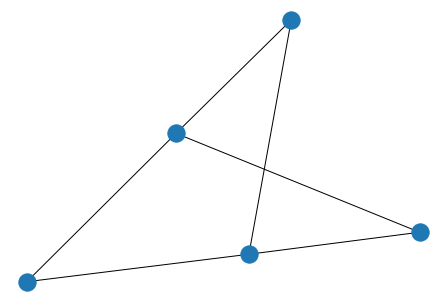

In [2]:
import networkx as nx
elist = [[0,2],[0,4],[1,2],[1,4],[0,3],[1,3]]
G = nx.OrderedGraph()
G.add_edges_from(elist)
# w = nx.adjacency_matrix(G, nodelist=range(G.number_of_nodes()))
nx.draw(G)

In [ ]:
qaoaplus_one_run(1, G, initial_state_variation='all_hadamard')

In [ ]:
stuart_one_run(1, G, initial_state_variation='w_state')

In [ ]:
stuart_one_run(1, G)

In [ ]:
from variationaltoolkit.misqaoaplusfunctions import qaoaplus_one_run, qaoaplus_compute_energy_avg_with_pruning, qaoaplus_compute_energy_average_min

In [4]:
def qaoaplus_compute_min(p, num_experiment_iter, G, initial_state_variation='all_zero', energy_prunning=False):
    energy_min = 0
    for i in range(num_experiment_iter):
        print ("experiment=",i)
        if energy_prunning == False:
            counts, res = qaoaplus_one_run(1, G, initial_state_variation=initial_state_variation, print_out_res=False)
            current_energy = res['min_val']
        else:
            current_energy = qaoaplus_compute_energy_avg_with_pruning(1, G, initial_state_variation=initial_state_variation)
        if current_energy < energy_min:
            energy_min = current_energy
    print('the mininum energy is : ' + str(energy_min))
    return energy_min

In [7]:
#connect
n = 4
d = 2
# be careful!
A=[]
for seed in range(4,10):
    print("seed=", seed)
    G = nx.gnp_random_graph(n, d/n, seed=seed)
    min_energy = qaoaplus_compute_min(1, 3, G, initial_state_variation='all_hadamard', energy_prunning=False)
    print("min_energy=", min_energy)
    A.append(min_energy)
print(A)
print(len(A))
print(sum(A)/len(A))
print(0.969* 4/2)

seed= 4
experiment= 0
Found optimal solution: (-1, array([0, 0, 1, 0]))
experiment= 1
Found optimal solution: (-1, array([0, 0, 1, 0]))
experiment= 2
Found optimal solution: (-1, array([0, 0, 1, 0]))
the mininum energy is : -0.5956
min_energy= -0.5956
seed= 5
experiment= 0
Found optimal solution: (-4, array([1, 1, 1, 1]))
experiment= 1
Found optimal solution: (-4, array([1, 1, 1, 1]))
experiment= 2
Found optimal solution: (-4, array([1, 1, 1, 1]))
the mininum energy is : -3.9974
min_energy= -3.9974
seed= 6
experiment= 0
Found optimal solution: (-2, array([0, 1, 1, 1]))
experiment= 1
Found optimal solution: (-2, array([0, 1, 1, 1]))
experiment= 2
Found optimal solution: (-2, array([0, 1, 1, 1]))
the mininum energy is : -1.7982
min_energy= -1.7982
seed= 7
experiment= 0
Found optimal solution: (-2, array([1, 0, 1, 0]))
experiment= 1
Found optimal solution: (-2, array([1, 0, 1, 0]))
experiment= 2
Found optimal solution: (-2, array([1, 0, 1, 0]))
the mininum energy is : -1.448
min_energy= -

In [9]:
#connect
n = 4
d = 2
# be careful!
A=[]
for seed in range(4,10):
    print("seed=", seed)
    G = nx.gnp_random_graph(n, d/n, seed=seed)
    min_energy = qaoaplus_compute_min(1, 3, G, initial_state_variation='all_hadamard', energy_prunning=True)
    print("min_energy=", min_energy)
    A.append(min_energy)
print(A)
print(len(A))
print(sum(A)/len(A))
print(0.969* 4/2)

seed= 4
experiment= 0
Found optimal solution: (-1, array([0, 0, 1, 0]))
the energy of the solution is -0.9825523429710867
feasible solution percetage ratio is
40.12%

experiment= 1
Found optimal solution: (-1, array([0, 0, 1, 0]))
the energy of the solution is -0.8572372769332453
feasible solution percetage ratio is
30.259999999999998%

experiment= 2
Found optimal solution: (-1, array([0, 0, 1, 0]))
the energy of the solution is -0.9561878952122854
feasible solution percetage ratio is
44.28%

the mininum energy is : -0.9825523429710867
min_energy= -0.9825523429710867
seed= 5
experiment= 0
Found optimal solution: (-4, array([1, 1, 1, 1]))
the energy of the solution is -3.9998
feasible solution percetage ratio is
100.0%

experiment= 1
Found optimal solution: (-4, array([1, 1, 1, 1]))
the energy of the solution is -4.0
feasible solution percetage ratio is
100.0%

experiment= 2
Found optimal solution: (-4, array([1, 1, 1, 1]))
the energy of the solution is -4.0
feasible solution percetage 

In [ ]:
[-0.6716, -4.0, -1.6112, -1.3414, -1.1156, -1.0096]
[-0.942939784380752, -4.0, -1.6066790352504638, -1.1295774647887324, -1.4948733413751507, -1.578660860097986]

In [ ]:
# edgelists of some other interesting graphs

elist_dict = {
        'trivial_8nodes' : [[0,1], [1,2], [2,3], [3,4], [4,5], [5,6], [4,7]],
        'trivial_9nodes' : [[0,1], [1,2], [2,3], [3,4], [4,5], [5,6], [4,7], [0,8]],
        'l3': [[0,1], [1,2], [2,3], [3,4], [4,5], [5,0], [1,4]],
        'k34': [[0,3], [0,4], [0,5], [0,6], [1,3], [1,4], [1,5], [1,6], [2,3], [2,4], [2,5],[2,6]],
        'c5' : [[0,1], [1,2], [2,3], [3,4], [4,0]],
        'c8' : [[0,1], [1,2], [2,3], [3,4], [4,5], [5,6], [6,7], [7,0]],
        'peterson' : [
                [0,1],[1,2],[2,3],[3,4],[4,0],
                [0,5],[1,6],[2,7],[3,8],[4,9],
                [5,7],[5,8],[6,8],[6,9],[7,9]
            ],
        'heawood' : [(0, 1), (0, 13), (0, 5), (1, 2), (1, 10), (2, 3), (2, 7), (3, 4), (3, 12), (4, 5), (4, 9), (5, 6), (6, 7), (6, 11), (7, 8), (8, 9), (8, 13), (9, 10), (10, 11), (11, 12), (12, 13)],
        'pappus' : [(0, 1), (0, 17), (0, 5), (1, 2), (1, 8), (2, 3), (2, 13), (3, 4), (3, 10), (4, 5), (4, 15), (5, 6), (6, 7), (6, 11), (7, 8), (7, 14), (8, 9), (9, 10), (9, 16), (10, 11), (11, 12), (12, 13), (12, 17), (13, 14), (14, 15), (15, 16), (16, 17)],
        'desargues' : [(0, 1), (0, 19), (0, 5), (1, 2), (1, 16), (2, 3), (2, 11), (3, 4), (3, 14), (4, 5), (4, 9), (5, 6), (6, 7), (6, 15), (7, 8), (7, 18), (8, 9), (8, 13), (9, 10), (10, 11), (10, 19), (11, 12), (12, 13), (12, 17), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19)],
        'dodecahedral' : [(0, 1), (0, 19), (0, 10), (1, 2), (1, 8), (2, 3), (2, 6), (3, 4), (3, 19), (4, 5), (4, 17), (5, 6), (5, 15), (6, 7), (7, 8), (7, 14), (8, 9), (9, 10), (9, 13), (10, 11), (11, 12), (11, 18), (12, 13), (12, 16), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19)],
        'moebius_kantor' : [(0, 1), (0, 15), (0, 5), (1, 2), (1, 12), (2, 3), (2, 7), (3, 4), (3, 14), (4, 5), (4, 9), (5, 6), (6, 7), (6, 11), (7, 8), (8, 9), (8, 13), (9, 10), (10, 11), (10, 15), (11, 12), (12, 13), (13, 14), (14, 15)],
        'icosahedral' : [(0, 1), (0, 5), (0, 7), (0, 8), (0, 11), (1, 2), (1, 5), (1, 6), (1, 8), (2, 3), (2, 6), (2, 8), (2, 9), (3, 4), (3, 6), (3, 9), (3, 10), (4, 5), (4, 6), (4, 10), (4, 11), (5, 6), (5, 11), (7, 8), (7, 9), (7, 10), (7, 11), (8, 9), (9, 10), (10, 11)]
}

elist = elist_dict['peterson']
G = nx.OrderedGraph()
G.add_edges_from(elist)

# Some others

G = nx.generators.classic.wheel_graph(n)



In [ ]:
#connecte
n = 4
d = 2
# be careful!
A=[]
for seed in range(4,10):
    print("seed=", seed)
    G = nx.gnp_random_graph(n, d/n, seed=seed)
    min_energy = qaoaplus_compute_min(1, 5, G)
    print("min_energy=", min_energy)
    A.append(min_energy)
print(A)
print(len(A))
print(sum(A)/len(A))
print(0.969* 4/2)

# 1.64 1.00 1.87

In [ ]:
n = 14
d = 3
# be careful!
A=[]
for seed in range(0,40):
    G = nx.gnp_random_graph(n, d/n, seed=seed)
    if nx.is_connected(G):
        min_energy = qaoaplus_compute_min(1, 20, G)
        print(“min_energy=“, min_energy)
        A.append(min_energy)
print(A)
print(len(A))
print(sum(A)/len(A))
print(0.969* 14/3)